In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
import glob

In [2]:
df=pd.concat([pd.read_csv(f, compression="gzip", header=None, usecols=[5,6,7,8,9,10,11,12,13,14,15,16,18,19]) for f in glob.glob(r"C:\Users\so51713\Documents\GoogleCloudDS\task_usage1\part-00*.csv.gz")])

In [3]:
print(df.shape)
df.columns=[ 'MeanCPUUsage', 'CanMemUsage','AssgnMemUsage','UnmapPCMemUsage','TotalPCMemUsage','MaxMemUsage','MeanDIOTime','MeanLocalDiskUsed','MaxCPUUsage','MaxDIOTime','CPI','MAI','AggType','SamplCPUUsage']

(12210234, 14)


In [4]:
# df = pd.concat([pd.read_csv(f,names=["STime","ETime","JobID","TaskID","MachineID","CPUusage","CanMEMusage","AsgnMEMusage","UpcMEMusage","TpcMEMusage","MaxMEMusage","AvgDiskIOusage","AvgLocDiskSPACEusage","MaxCPUusage","MaxDiskIO","CPI","MAI","SampPortion","AggType","SampCPUusage"]) for f in glob.glob(r"C:\Users\so51713\Documents\GoogleCloudDS\task_usage\extracts\part-00*.csv")], ignore_index = True,sort=False)
# print(df.shape)

nonEmptyDF=df.dropna()
print(nonEmptyDF.shape)

(10262355, 14)


In [5]:
#nonEmptyDF.to_csv(r"C:\Users\so51713\Documents\GoogleCloudDS\task_usage1\output\output.csv", encoding='utf-8')

In [6]:

featureDF=nonEmptyDF.drop(nonEmptyDF.columns[[10]], axis=1)

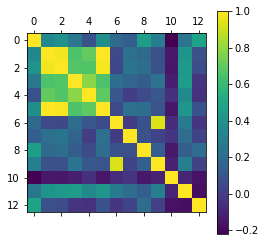

In [7]:
plt.matshow(featureDF.corr())
plt.colorbar()
plt.show()

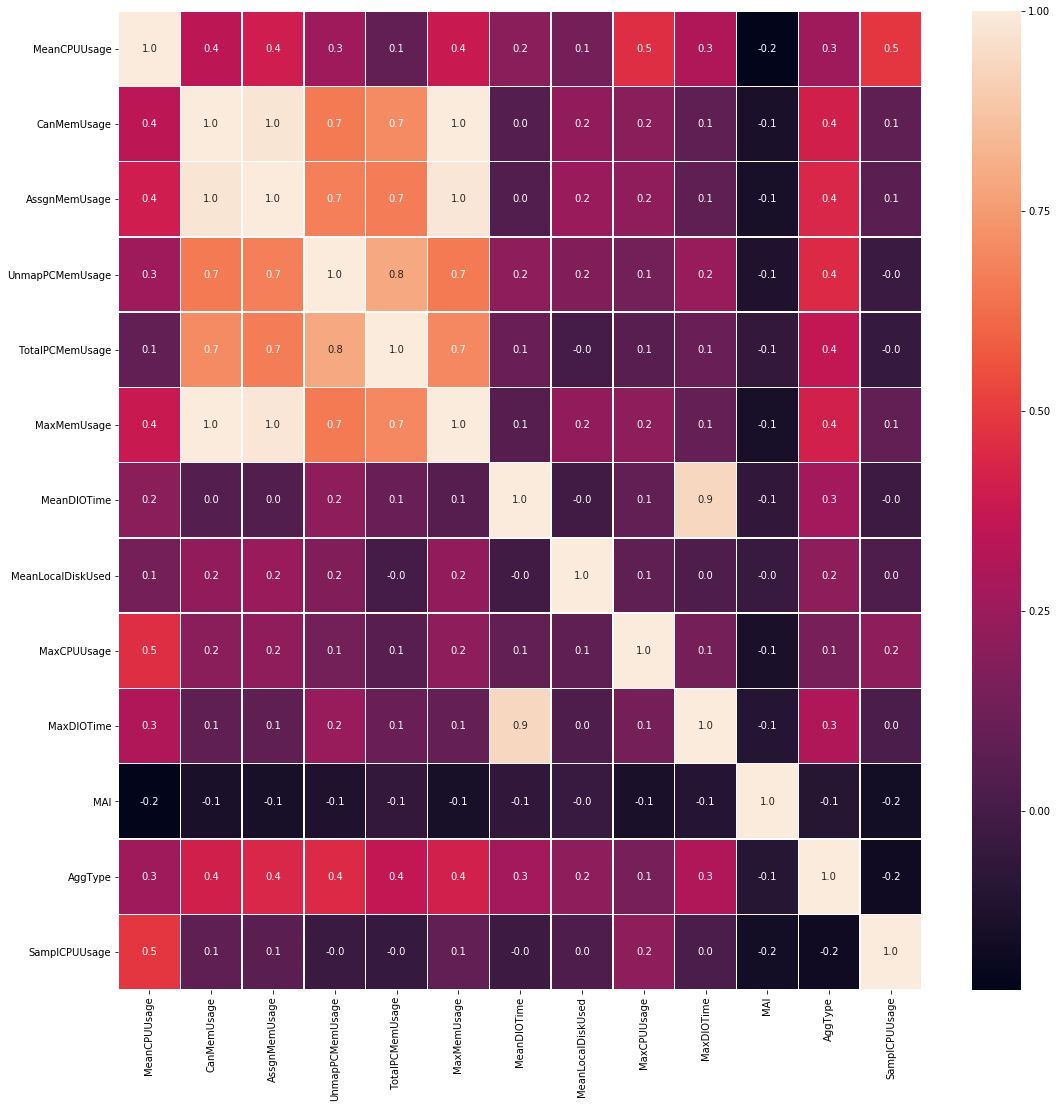

In [8]:
import seaborn as sns 
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(featureDF.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [9]:
# sns.set(style="ticks")
# df = sns.load_dataset("iris")
# sns.pairplot(df, hue="species")


# from pandas.plotting import scatter_matrix
# scatter_matrix(featureDF, alpha = 0.2, figsize = (25,25))
# plt.show()

In [10]:
# plt.show()

In [11]:
# plt.scatter(nonEmptyDF['MeanCPUUsage'],nonEmptyDF['CPI'])
# plt.show()

In [12]:
# #Plotting scatter matrix 
# pd.plotting.scatter_matrix(tempDS, figsize=(26, 26))
# plt.show()

In [13]:
# #Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

input=nonEmptyDF.drop(nonEmptyDF.columns[[10]], axis=1)
X=input.values
Y=nonEmptyDF.iloc[:,10].values

Y = np.array(Y).astype(int)
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, Y)
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# summarize selected features
print(features[0:3,:])



[1.600e+05 3.632e+04 3.650e+04 5.979e+03 3.961e+04 3.877e+04 5.098e+04
 6.987e+01 4.162e+05 1.610e+05 4.183e+05 6.704e+05 1.290e+05]
[[1.562e-03 7.568e-02 1.503e-03 6.787e-02 2.861e-06 3.967e-02 3.567e-04
  7.243e-03 1.000e+00 0.000e+00]
 [1.568e-03 7.556e-02 7.000e-04 6.787e-02 5.722e-06 3.302e-02 9.289e-04
  5.791e-03 1.000e+00 0.000e+00]
 [3.071e-04 9.521e-02 6.704e-04 8.044e-02 4.768e-06 2.377e-02 7.858e-04
  2.080e-02 1.000e+00 0.000e+00]]


In [22]:
print(X)

[[1.562e-03 6.787e-02 7.568e-02 ... 7.243e-03 1.000e+00 0.000e+00]
 [1.568e-03 6.787e-02 7.556e-02 ... 5.791e-03 1.000e+00 0.000e+00]
 [3.071e-04 8.044e-02 9.521e-02 ... 2.080e-02 1.000e+00 0.000e+00]
 ...
 [1.364e-04 2.670e-05 0.000e+00 ... 1.064e-03 0.000e+00 0.000e+00]
 [1.460e-02 3.475e-03 4.517e-03 ... 3.184e-03 0.000e+00 2.481e-02]
 [1.488e-02 3.075e-03 4.005e-03 ... 1.176e-03 0.000e+00 3.525e-03]]


In [14]:
# #Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

C:\Users\so51713\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.087 0.067 0.057 0.049 0.057 0.055 0.043 0.051 0.041 0.044 0.38  0.015
 0.054]


In [15]:
# #MLR
# from sklearn.preprocessing import MinMaxScaler
# input=nonEmptyDF.drop(nonEmptyDF.columns[[10]], axis=1)
# X=input.values
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# Y=nonEmptyDF.iloc[:,10].values
# print(Y)
# print(X)
# np.size(X,1)

In [16]:
#plt.plot(X, Y, 'o', color='black');

In [17]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [18]:
# from sklearn import model_selection
# seed = 7
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# model = LinearRegression()
# scoring = 'r2'
# results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# //print("R^2: %.3f (%.3f)") % (results.mean(), results.std())


In [19]:
# print(results.mean())

In [20]:
# import statsmodels.formula.api as sm
# X_new=np.append(arr= np.ones((len(nonEmptyDF),1)).astype(int),values=X,axis=1)
# X_opt=X_new[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
# regressor_ols=sm.OLS(endog=Y,exog=X_opt).fit()

In [21]:
# regressor_ols.summary()